In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\admin\Downloads\Bank_Churn.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [22]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


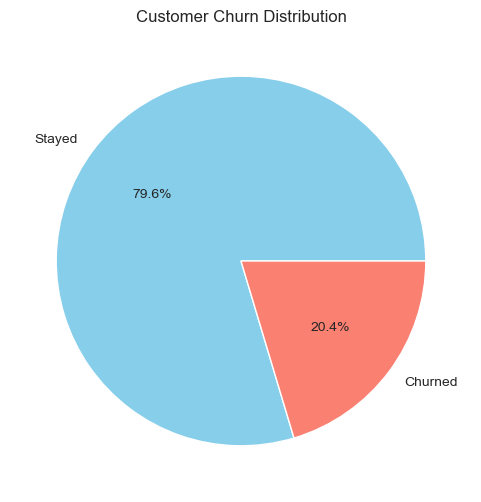

In [23]:
# Convert categorical columns for visualization
if "Geography" in df.columns:
    df["Geography"] = df["Geography"].astype(str)

# Set plot style
sns.set_style("whitegrid")

# 1. Churn Distribution Pie Chart
plt.figure(figsize=(6, 6))
df["Exited"].value_counts().plot.pie(autopct='%1.1f%%', labels=["Stayed", "Churned"], colors=["skyblue", "salmon"])
plt.title("Customer Churn Distribution")
plt.ylabel("")
plt.show()

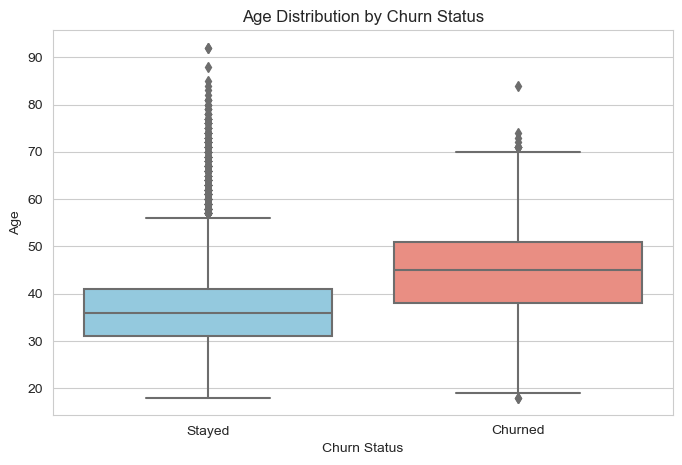

In [24]:
# 2. Age vs. Churn (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Exited"], y=df["Age"], palette=["skyblue", "salmon"])
plt.xticks(ticks=[0, 1], labels=["Stayed", "Churned"])
plt.title("Age Distribution by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Age")
plt.show()

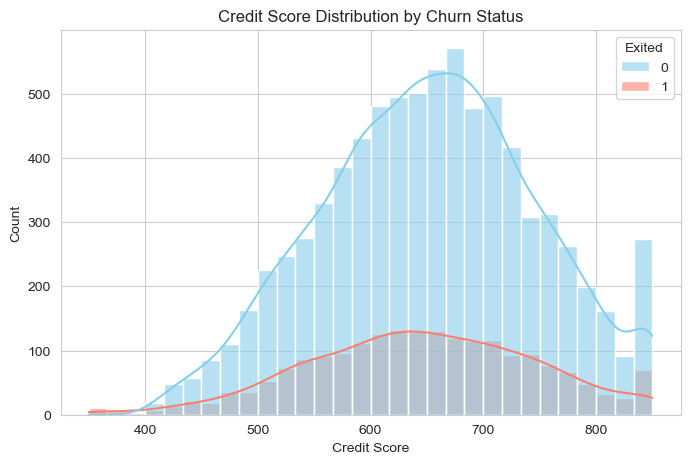

In [25]:
# 3. Credit Score vs. Churn (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="CreditScore", hue="Exited", bins=30, kde=True, palette=["skyblue", "salmon"], alpha=0.6)
plt.title("Credit Score Distribution by Churn Status")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

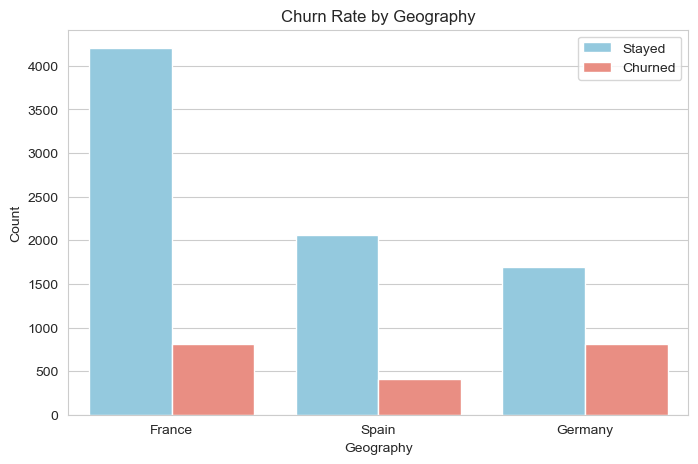

In [28]:
# 4. Churn Rate by Geography (Bar Chart)
plt.figure(figsize=(8, 5))
sns.countplot(x="Geography", hue="Exited", data=df, palette=["skyblue", "salmon"])
plt.title("Churn Rate by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.legend(["Stayed", "Churned"])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop irrelevant columns
df = df.drop(columns=["CustomerId", "Surname"])

# Encode categorical variables
label_encoders = {}
for col in ["Geography", "Gender"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
# Split features and target variable
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [6]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
# Display processed data shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Predict on test data
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Convert classification report into a DataFrame
report_df = pd.DataFrame(report).transpose()

# Print results
print(f"Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(report_df)


Model Accuracy: 0.8640

Classification Report:
              precision    recall  f1-score   support
0              0.874645  0.967985  0.918951  1593.000
1              0.784810  0.457002  0.577640   407.000
accuracy       0.864000  0.864000  0.864000     0.864
macro avg      0.829728  0.712494  0.748295  2000.000
weighted avg   0.856364  0.864000  0.849494  2000.000


In [14]:
# Predict churn for the entire dataset
df["Predicted_Exited"] = model.predict(X_scaled)

# Save the final results to a CSV file
output_file = "Bank_Churn_Predictions.csv"
df.to_csv(output_file, index=False)

# Provide the file path
output_file

'Bank_Churn_Predictions.csv'

In [15]:
# Summarize the predictions
predictions_summary = df["Predicted_Exited"].value_counts().rename(index={0: "Will Stay", 1: "Will Churn"})
predictions_summary

Will Stay     8133
Will Churn    1867
Name: Predicted_Exited, dtype: int64

In [18]:
# Reload original dataset to get CustomerId
df_original = pd.read_csv(r"C:\Users\admin\Downloads\Bank_Churn.csv")

# Add CustomerId back to the predictions DataFrame
df["CustomerId"] = df_original["CustomerId"]

# Save the updated predictions file
updated_output_file = "Bank_Churn_Predictions_Updated.csv"
df.to_csv(updated_output_file, index=False)

# Provide the new file path
updated_output_file

'Bank_Churn_Predictions_Updated.csv'

In [20]:
# Function to check if a customer will churn or stay
def check_customer_churn(customer_id):
    # Load predictions file
    df = pd.read_csv("Bank_Churn_Predictions_Updated.csv")

    # Search for the customer by ID
    customer_data = df[df["CustomerId"] == customer_id]

    if customer_data.empty:
        return f"Customer ID {customer_id} not found."

    # Get prediction
    prediction = customer_data["Predicted_Exited"].values[0]
    result = "Will Churn" if prediction == 1 else "Will Stay"

    return f"Customer ID {customer_id}: {result}"

# Get customer ID from user input
customer_id = int(input("Enter Customer ID: "))

# Check churn prediction for the entered ID
print(check_customer_churn(customer_id))

Enter Customer ID: 15656148
Customer ID 15656148: Will Churn


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Load the predicted dataset
file_path = "Bank_Churn_Predictions_Updated.csv"
df = pd.read_csv(file_path)

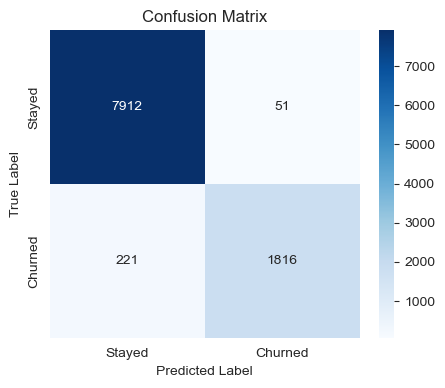

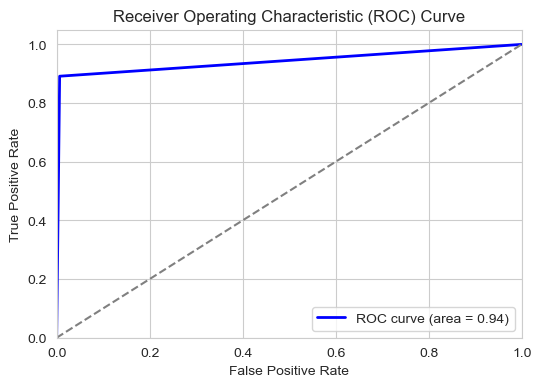

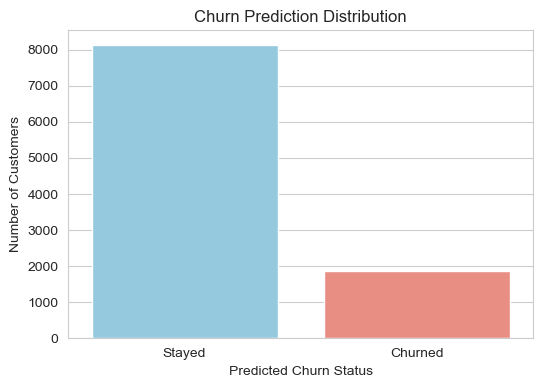

In [43]:
# Check if required columns exist
if "Exited" in df.columns and "Predicted_Exited" in df.columns:
    y_true = df["Exited"]
    y_pred = df["Predicted_Exited"]

    # 1. Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # 2. ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

    # 3. Churn Prediction Distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x="Predicted_Exited", data=df, palette=["skyblue", "salmon"])
    plt.xticks(ticks=[0, 1], labels=["Stayed", "Churned"])
    plt.xlabel("Predicted Churn Status")
    plt.ylabel("Number of Customers")
    plt.title("Churn Prediction Distribution")
    plt.show()
else:
    print("Error: Required columns 'Exited' and 'Predicted_Exited' not found in dataset.")
